In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2

#load the csv file
df = pd.read_csv ("../input/ai-companies/AI_Companies.csv", index_col= 0)

# Column Information

In [3]:
df.info()

df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
Index: 3100 entries, Smith.ai to HypeTeqSoftwareSolutions
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Website                   3099 non-null   object
 1   Location                  3087 non-null   object
 2   Minimum Project Size      3100 non-null   object
 3   Average Hourly Rate       3100 non-null   object
 4   Number of Employees       3100 non-null   object
 5   Percent AI Service Focus  3100 non-null   object
 6   Unnamed: 7                1 non-null      object
dtypes: object(7)
memory usage: 193.8+ KB


,count,unique,top,freq
Website,3099,3097,https://contata.com/,2
Location,3087,998,"London, United Kingdom",184
Minimum Project Size,3100,10,Undisclosed,1158
Average Hourly Rate,3100,9,Undisclosed,1247
Number of Employees,3100,8,10 - 49,1389
Percent AI Service Focus,3100,39,10%,879
Unnamed: 7,1,1,40%,1


# Null Values and duplicate rows:
*The location column contained null values, so I subset to see if it has relevant information in other columns, else, I'll drop it*

In [4]:
df.drop_duplicates(subset= ["Website"],keep="first",inplace = True)

df.isnull().sum()
#df[df["Location"].isnull()]

Website                        1
Location                      13
Minimum Project Size           0
Average Hourly Rate            0
Number of Employees            0
Percent AI Service Focus       0
Unnamed: 7                  3097
dtype: int64

In [5]:
df[~df["Unnamed: 7"].isnull()]

,Website,Location,Minimum Project Size,Average Hourly Rate,Number of Employees,Percent AI Service Focus,Unnamed: 7
Company_Name,,,,,,,
Cloud(X),NaN,https://www.cloudx.com,"Yerba Buena, Argentina","$5,000+",$50 - $99 / hr,50 - 249,40%


**The column was shifted to the right. Shift inwards and drop the empty column created by the shift

In [6]:
df.loc["Cloud(X)"]= df.loc["Cloud(X)"].shift(periods= -1)
df.drop(["Unnamed: 7"], axis=1, inplace= True)

# Split location column 

In [7]:
df["City"]= None
df["Country"]= None
for lab, row in df.iterrows():
    location = str(row["Location"])
    
    if "," in location:
        df.at[lab, "City"], df.at[lab, "Country"]= map(str.strip, location.split(",", 1))
    else:
        df.at[lab, "Country"]= location.strip()

*Notice, how US states are abbreviated egNY and have no country attached to them
I'll first duplicate the column to preserve the values, before renaming to USA*

In [8]:
df[df.loc[:,'Country'].astype(str).str.len()==2]

,Website,Location,Minimum Project Size,Average Hourly Rate,Number of Employees,Percent AI Service Focus,City,Country
Company_Name,,,,,,,,
Smith.ai,https://smith.ai/,"Los Altos, CA",Undisclosed,Undisclosed,250 - 999,10%,Los Altos,CA
MooveIt,https://moove-it.com/,"Austin, TX","$100,000+",$50 - $99 / hr,50 - 249,15%,Austin,TX
TechSpeedInc,http://www.techspeed.com/,"Portland, OR","$1,000+",< $25 / hr,50 - 249,40%,Portland,OR
WillDom,https://willdom.com/,"Fort Lauderdale, FL","$10,000+",$50 - $99 / hr,250 - 999,10%,Fort Lauderdale,FL
Icreon,https://www.icreon.com/en,"New York, NY","$50,000+",$100 - $149 / hr,250 - 999,10%,New York,NY
...,...,...,...,...,...,...,...,...
SoftwarePro,https://softwaredeveloperspro.com/,"Las Vegas, NV","$10,000+",$25 - $49 / hr,250 - 999,10%,Las Vegas,NV
Zone24x7Inc.,https://zone24x7.com/,"San Jose, CA","$10,000+",$25 - $49 / hr,50 - 249,20%,San Jose,CA
HurekaTechnologiesInc,http://www.hurekatek.com,"New Brunswick, NJ","$10,000+",$25 - $49 / hr,10 - 49,20%,New Brunswick,NJ


In [9]:
df["Country_2_usastates"]= df.loc[:, "Country"]
for lab,row in df.iterrows():
    if len(str(row["Country"])) == 2 :
        df.at[lab,'Country'] = 'United States of America'
    else:
        continue
df["Country"].value_counts()

Country
United States of America                899
India                                   437
United Kingdom                          299
Poland                                  147
Canada                                  122
                                       ... 
Luxembourg                                1
United States Minor Outlying Islands      1
Slovenia                                  1
Puerto Rico                               1
Uzbekistan                                1
Name: count, Length: 99, dtype: int64

# Next, transform the quantitative columns to proper numeric form in pandas:

In [10]:
df["Percent AI Service Focus"]= df["Percent AI Service Focus"].str.rstrip('%').astype(float) / 100.0

In [11]:
df["Minimum Project Size"] = df["Minimum Project Size"].apply(lambda x: \
    x.replace("$", "").replace("+", "") \
    .replace(",", "").replace("Undisclosed", "0") if any(char in x for char in ["$", "+", ",", "Undisclosed"]) else x)

df["Minimum Project Size"] = pd.to_numeric(df["Minimum Project Size"])
df["Minimum Project Size"].value_counts()

Minimum Project Size
0         1158
5000       556
10000      514
1000       431
25000      248
50000      130
100000      34
75000       15
250000      12
Name: count, dtype: int64

In [12]:
df["Number of Employees"] = df["Number of Employees"].apply(lambda x: \
    x.replace(",", "").replace("+", " - 10001").replace("Freelancer", "0 - 0") \
    if any(char in x for char in ["+", ",", "Freelancer"]) else x)

min_max_values= df['Number of Employees'].astype(str).str.split('-', expand=True) 
df.loc[:,'Number of Employees'] = pd.to_numeric(min_max_values[0])
df["Number of Employees"].value_counts()

Number of Employees
10       1388
50        775
2         644
250       200
1000       57
0          23
10000      11
Name: count, dtype: int64

In [13]:
df['Average Hourly Rate'] = df['Average Hourly Rate'].apply(lambda x: \
    x.replace("$", "").replace(" / hr", "").replace("- 300", " - 299") \
    .replace("<", "1 - ").replace("Undisclosed","0").replace("+", " - 301") \
    if any(char in x for char in ["$", "/hr", "+", "<", "Undisclosed"]) else x)

min_max_values= df['Average Hourly Rate'].astype(str).str.split('-', expand=True) 
df.loc[:,"Average Hourly Rate"] = pd.to_numeric(min_max_values[0])  
df["Average Hourly Rate"].value_counts()

Average Hourly Rate
0      1247
25      693
50      507
1       264
100     254
150      80
200      35
300      18
Name: count, dtype: int64

In [14]:
!pip install pycountry-convert

# Mapping countries to their continents
*I realized later, there was no need for this since I still used geopandas*

In [15]:
import pycountry_convert as pc

def country_convert (country_name):
    if country_name is not None and isinstance(country_name, str):
        try:
            cont = pc.country_name_to_country_alpha2(country_name)
            cont_code= pc.country_alpha2_to_continent_code(cont)
            continent_name = pc.convert_continent_code_to_continent_name(cont_code)
            return continent_name
        except Exception as e: 
            return "Unknown"
    else:
        return "Invalid Country Name"

#country_convert(df, "Country")
df["Continent"]= df["Country"].apply(country_convert)
df["Continent"].value_counts()

/opt/conda/lib/python3.10/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/opt/conda/lib/python3.10/site-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


Continent
North America    1073
Europe            899
Asia              817
South America     144
Oceania            99
Unknown            39
Africa             27
Name: count, dtype: int64

# Done with cleaning the data, now, VISUALIZATION
*I begin by setting a customization for my viz titles*

In [16]:
title_dict= {'family':'serif','size':10,'weight':'bold'}

*then I define a function that subplots a histogram and kde for a numeric column*

In [17]:
def individual_column_vizzes(df,column):
    filtered_df = df.loc[df[column]!=0]
    fig, ax = plt.subplots(1,2, sharex= True, figsize = (8,4))
    sns.set_context("paper",font_scale=1.2)
    sns.set_style("white")
    sns.histplot(filtered_df[column], bins=40, ax=ax[0] )
    sns.kdeplot (filtered_df[column], ax= ax[1], fill= True, bw_adjust= 0.5)
    
    mean_value = filtered_df[column].mean()
    median_value = filtered_df[column].median()
    std_dev = filtered_df[column].std()
    lower_std_dev = mean_value - std_dev
    upper_std_dev = mean_value + std_dev
    
    ax[0].axvline(x=mean_value, color='red',alpha= 0.3, linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax[0].axvline(x=median_value, color='green',alpha=0.2, linestyle='-.', label=f'Median: {median_value:.2f}')
    ax[0].axvspan(lower_std_dev, upper_std_dev, alpha=0.12, color='orange', label=f'Std Dev: {lower_std_dev:.2f} - {upper_std_dev:.2f}')
   # ax[0].text(mean_value + std_dev + 0.02 * std_dev, 100, f'Std Dev: {std_dev:.2f}', color='black', ha='left')
   # ax[0].text(mean_value - std_dev - 0.1 * std_dev, 100, f'Std Dev: {std_dev:.2f}', color='black', ha='right')
    ax[0].legend() 
    xticks = ax[0].get_xticks()

    if column == 'Minimum Project Size' or column=="Average Hourly Rate":  
        xtick_labels = [f'${x:.0f}' if x < 1000 else f'${x/1000:.0f}k' for x in xticks]
    elif column == "Number of Employees":
        xtick_labels = [f'{x/1000:.0f}k' for x in xticks]
    else:
        xtick_labels= [f'{int(x*100)}%' for x in xticks]
    
    ax[0].set_xticklabels(xtick_labels)
    ax[0].set_title(column + ' Distribution',fontdict=title_dict)
    ax[1].set_title(column + ' KDE',fontdict=title_dict)
    [axes.set(xlabel='') for axes in ax]
    
    plt.tight_layout()

/tmp/ipykernel_267/1179608525.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(xtick_labels)


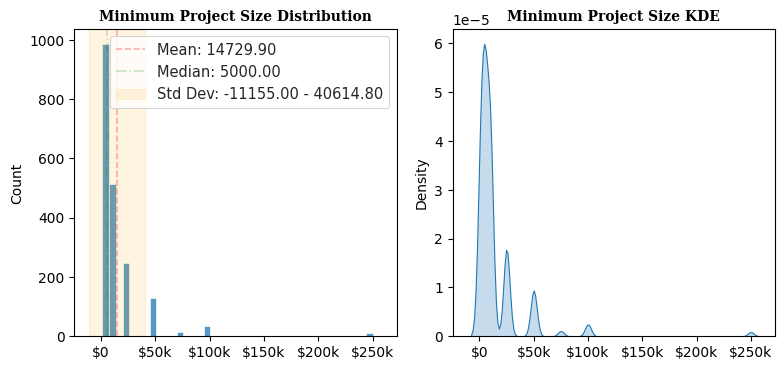

In [18]:
individual_column_vizzes(df, "Minimum Project Size")

/tmp/ipykernel_267/1179608525.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(xtick_labels)


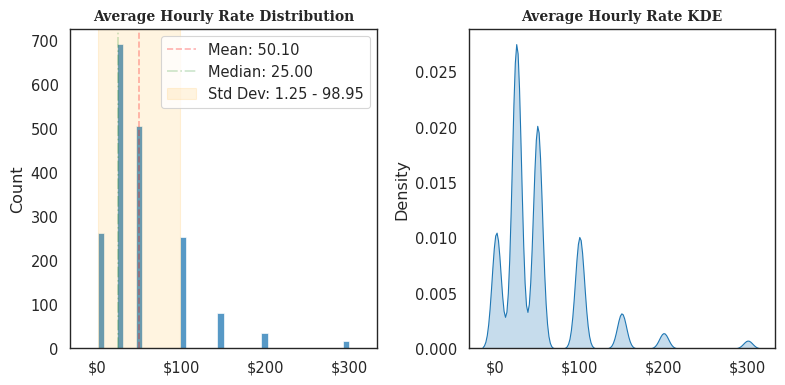

In [19]:
individual_column_vizzes(df, "Average Hourly Rate")

/tmp/ipykernel_267/1179608525.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(xtick_labels)


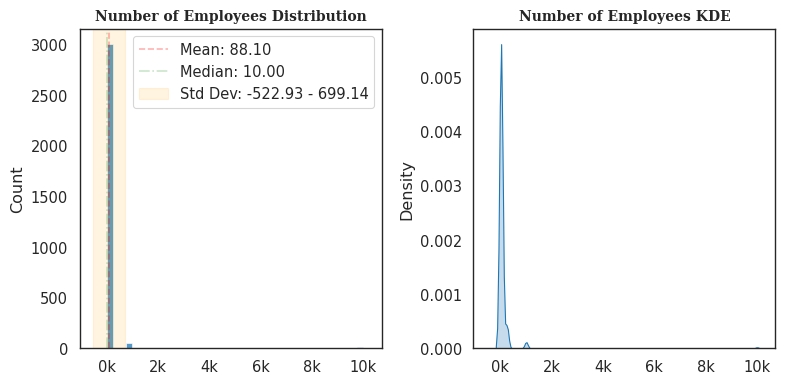

In [20]:
individual_column_vizzes(df, "Number of Employees")

/tmp/ipykernel_267/1179608525.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(xtick_labels)


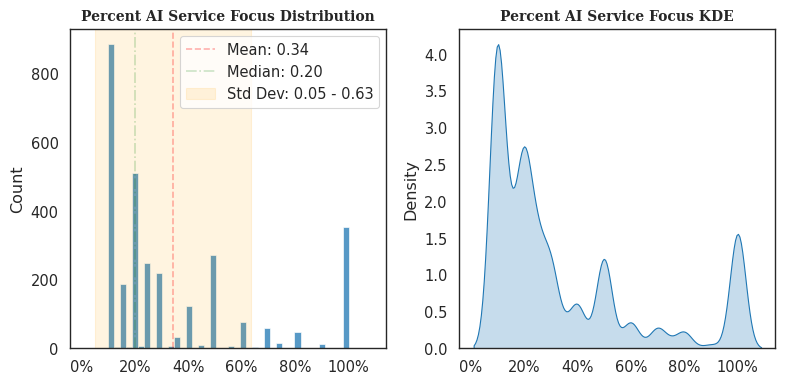

In [21]:
individual_column_vizzes(df, "Percent AI Service Focus")

# Column relationships with pairplot #

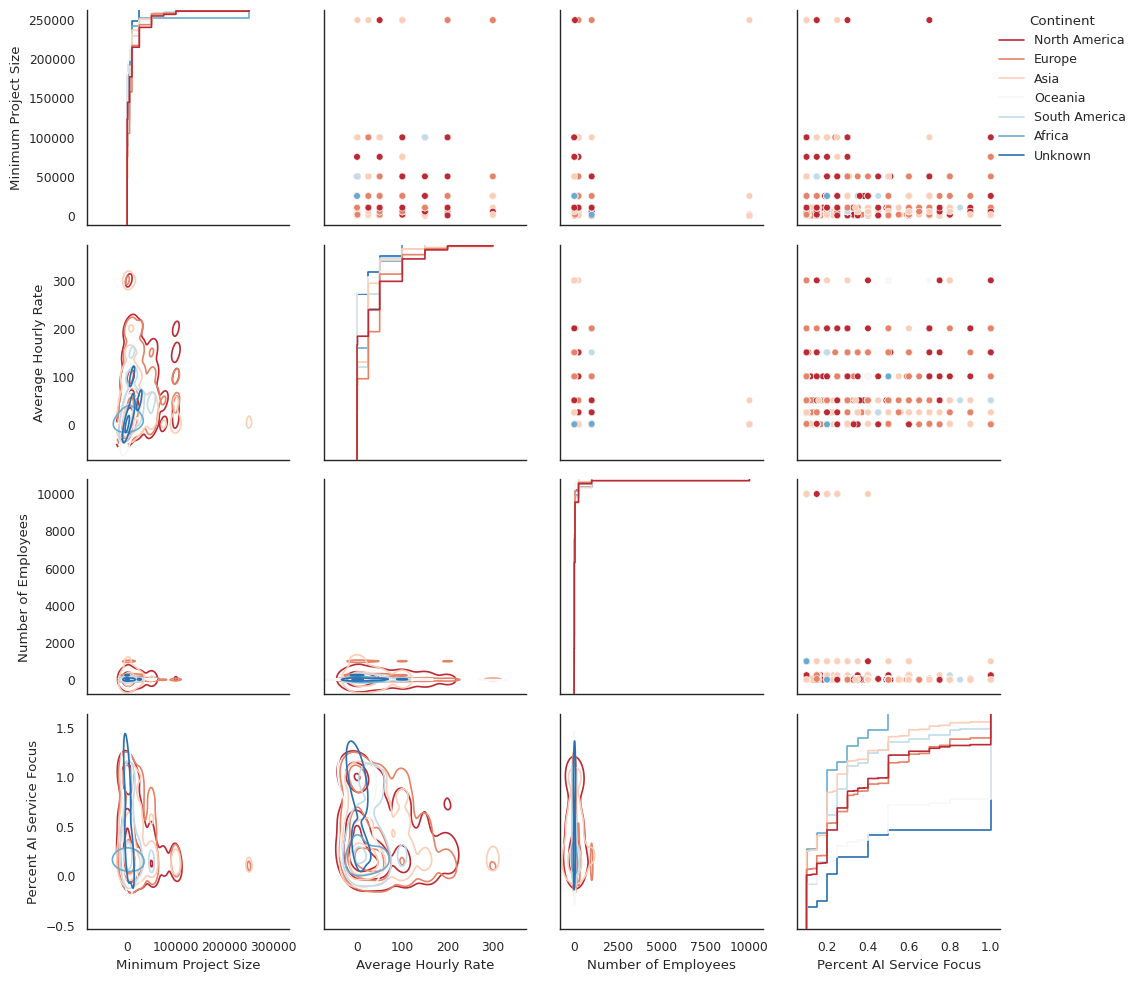

In [22]:
sns.set_context("paper",font_scale=1)
sns.set_style("white")
g=sns.PairGrid(df,hue=  "Continent", palette= "RdBu",)
g.map_diag(sns.ecdfplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, levels=4)
g= g.add_legend(fontsize=9,bbox_to_anchor=(0.99,0.9))

# Plotting countries on a map, and show hover information as tooltip #
*Begin by importing the necessary modules. Then merge the dataframe to world dataset, to aide map plot

In [23]:
import geopandas as gpd
import plotly.express as px
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_df = world_data.merge(df, how='right', left_on='name', right_on='Country')

/tmp/ipykernel_267/2197025605.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [24]:
merged_df.head(4)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Website,Location,Minimum Project Size,Average Hourly Rate,Number of Employees,Percent AI Service Focus,City,Country,Country_2_usastates,Continent
0,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",https://smith.ai/,"Los Altos, CA",0,0,250,0.10,Los Altos,United States of America,CA,North America
1,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",https://moove-it.com/,"Austin, TX",100000,50,50,0.15,Austin,United States of America,TX,North America
2,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",http://www.techspeed.com/,"Portland, OR",1000,1,50,0.40,Portland,United States of America,OR,North America
3,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",https://willdom.com/,"Fort Lauderdale, FL",10000,50,250,0.10,Fort Lauderdale,United States of America,FL,North America


In [25]:
country_counts=merged_df["Country"].value_counts().to_dict()
sizes=[country_counts.get(country,0)for country in merged_df["Country"]]
country_median = merged_df.groupby('Country')[['Average Hourly Rate','Minimum Project Size', 'Number of Employees', 'Percent AI Service Focus']].median().reset_index()
country_median.columns = ['Country', 'Median Hourly Rate($)', 'Median Project Size($)','Median No. of Employees','Median % AI Service Focus']

merged_df2 = pd.merge(merged_df, country_median, on='Country', how='left')
map_fig = px.scatter_geo(merged_df2,locations="iso_a3",
                         projection="orthographic",color="Continent",
                         opacity=.8,hover_name="Country",
                         size=sizes,size_max=40,
                         hover_data={
                             
                             "Median Project Size($)",'Median Hourly Rate($)','Median No. of Employees','Median % AI Service Focus'}
                        )
map_fig.show()

# Defining a function for a boxplot: 
*one plots columns with highly skewed data on a log scale and the other on normal scale*

In [26]:
def boxplot_on_log_scale(df,xvalue,yvalue):
    edited_df= df.loc[df[xvalue]!=0]
    sns.boxplot(data=edited_df,
                x=xvalue,y=yvalue,whis=(0,100),width=.5,color="#4e9daf",linewidth=.75)
    plt.xscale('log')
    plt.title(f'{xvalue} by {yvalue} Boxplot log-scaled',fontdict=title_dict)
    plt.ylabel('')
    plt.xlabel(f'{xvalue} in log form')
    
def boxplot_no_log_scale(df,xvalue,yvalue):
    edited_df= df.loc[df[xvalue]!=0]
    sns.boxplot(data=df,x=xvalue,y=yvalue,whis=(0,100),width=.5,color="#4e9daf",linewidth=.75)
    plt.title(f'{xvalue} by {yvalue} Boxplot',fontdict=title_dict)
    plt.ylabel('')

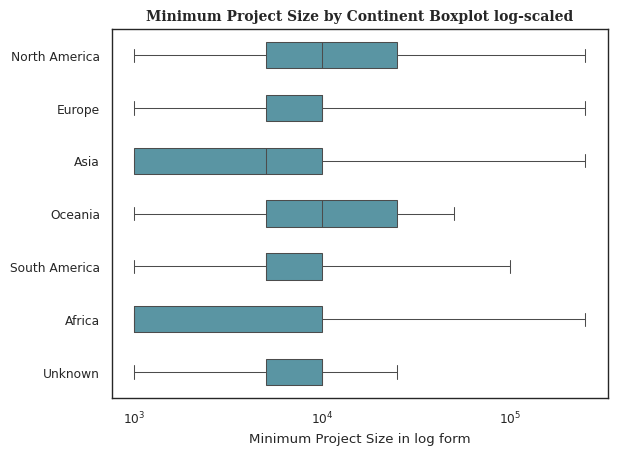

In [27]:
boxplot_on_log_scale(df,"Minimum Project Size","Continent")

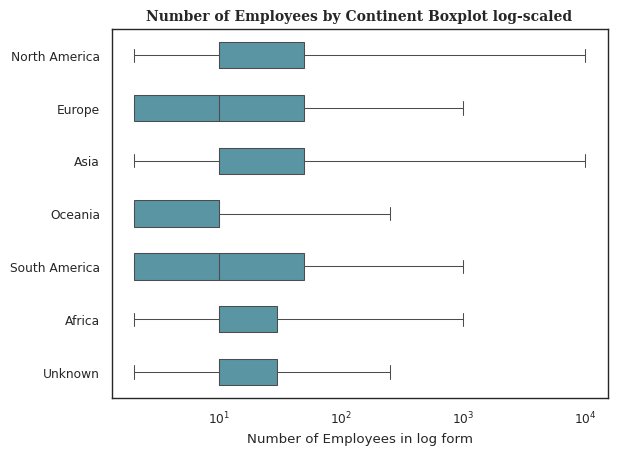

In [28]:
boxplot_on_log_scale(df,"Number of Employees","Continent")

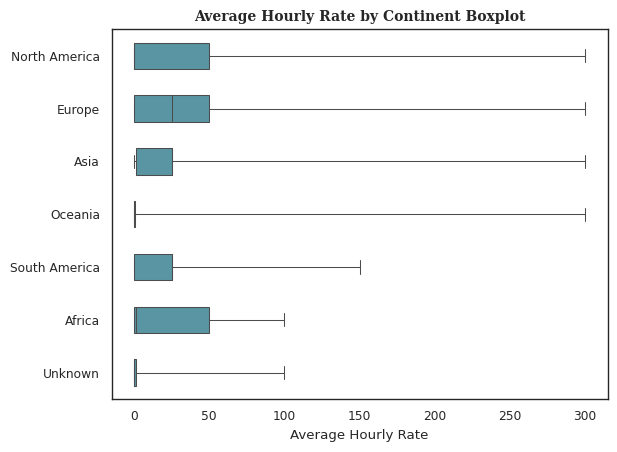

In [29]:
boxplot_no_log_scale(df,"Average Hourly Rate","Continent")

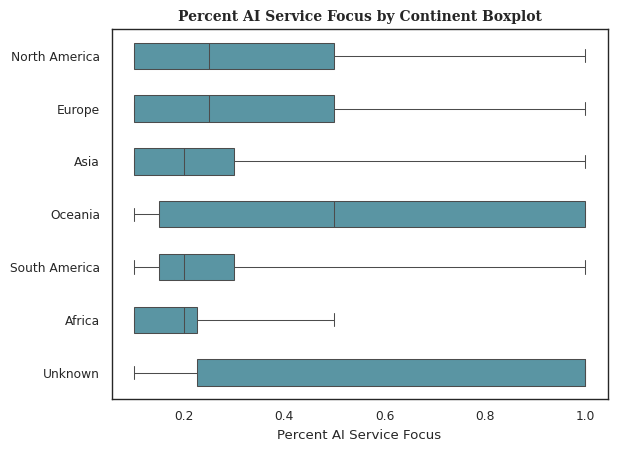

In [30]:
boxplot_no_log_scale(df,"Percent AI Service Focus","Continent")

# Another function that creates a heatmap out of a Pivot_table

In [31]:
def pivot_to_heatmap(df,index_var,col,value):
    filtered_df= df.loc[df[value]!=0]
    var= filtered_df.pivot_table(index=index_var , columns= col, values= value,fill_value=0, aggfunc=np.median)
    ax=sns.heatmap(var,linewidth=.7,cmap="Blues",
                   vmin=-20,annot=True,fmt=".0f",linecolor="black",square=True, 
                  annot_kws={
                      'fontsize':7,'fontweight':'bold','fontfamily':'arial'})
    ax.set(xlabel='',ylabel='')
    ax.xaxis.tick_bottom()
    plt.title(f'Heatmap: {value} of AI Companies across {index_var} by {col}',fontdict=title_dict,y=1.1,pad=20)

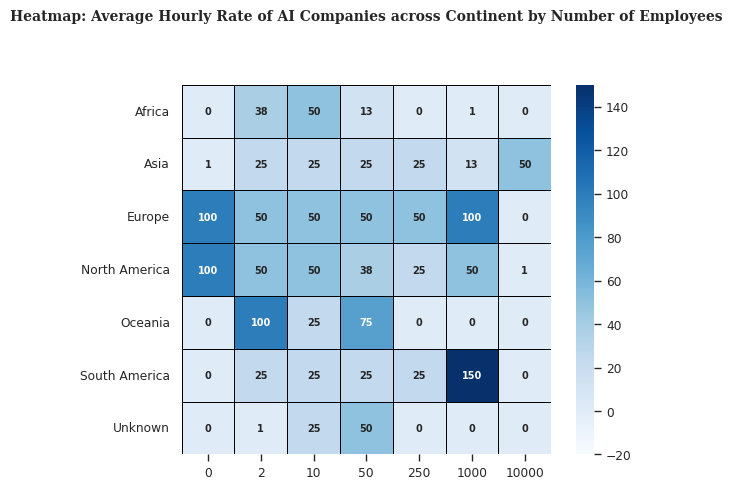

In [32]:
pivot_to_heatmap(df,"Continent","Number of Employees","Average Hourly Rate")

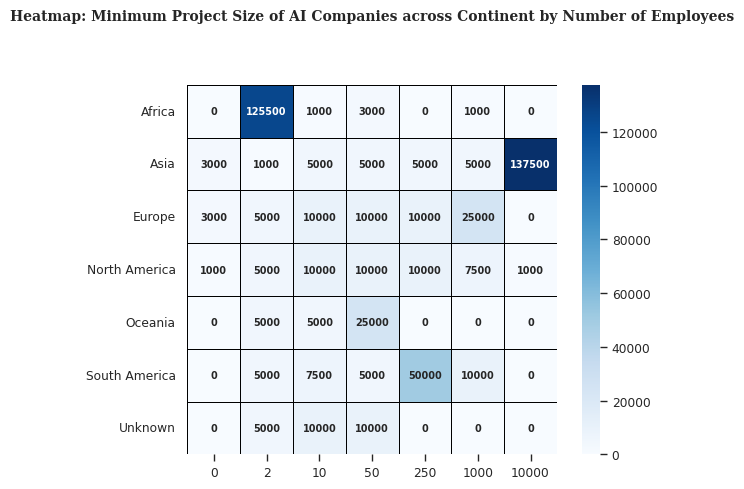

In [33]:
pivot_to_heatmap(df,"Continent","Number of Employees","Minimum Project Size")

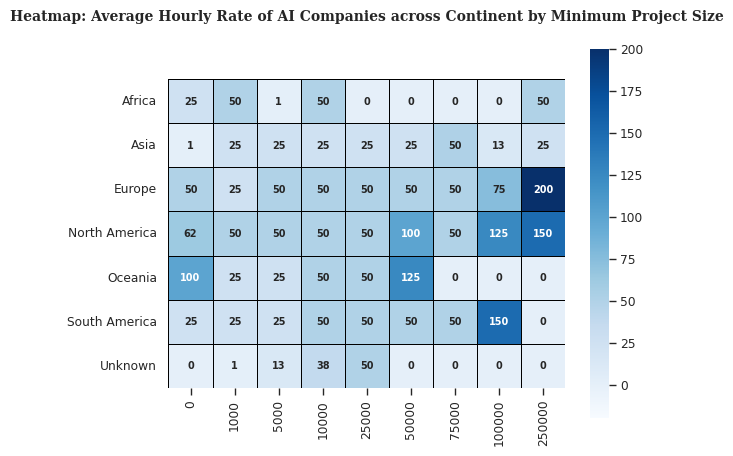

In [34]:
pivot_to_heatmap(df,"Continent","Minimum Project Size","Average Hourly Rate")

 *With this, variables can be plotted easily calling functio*ns. 